In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df = pd.read_csv('synthetic_ml_dataset.csv')

# ***`Data Cleaning & Preprocessing`***

In [3]:
# Drop unnecessary columns
df = df.drop(['Customer_ID', 'Joining_Date', 'Last_Activity_Date'], axis=1)

In [4]:
# Encode categorical variables
label_encoders = {}
for column in ['Gender', 'Employment_Status', 'Marital_Status', 'Region', 'Customer_Churn']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [5]:
# Feature scaling
scaler = StandardScaler()
df[['Annual_Income', 'Credit_Score', 'Account_Balance', 'Loan_Amount']] = scaler.fit_transform(
    df[['Annual_Income', 'Credit_Score', 'Account_Balance', 'Loan_Amount']]
)

# ***`Feature Selection`***

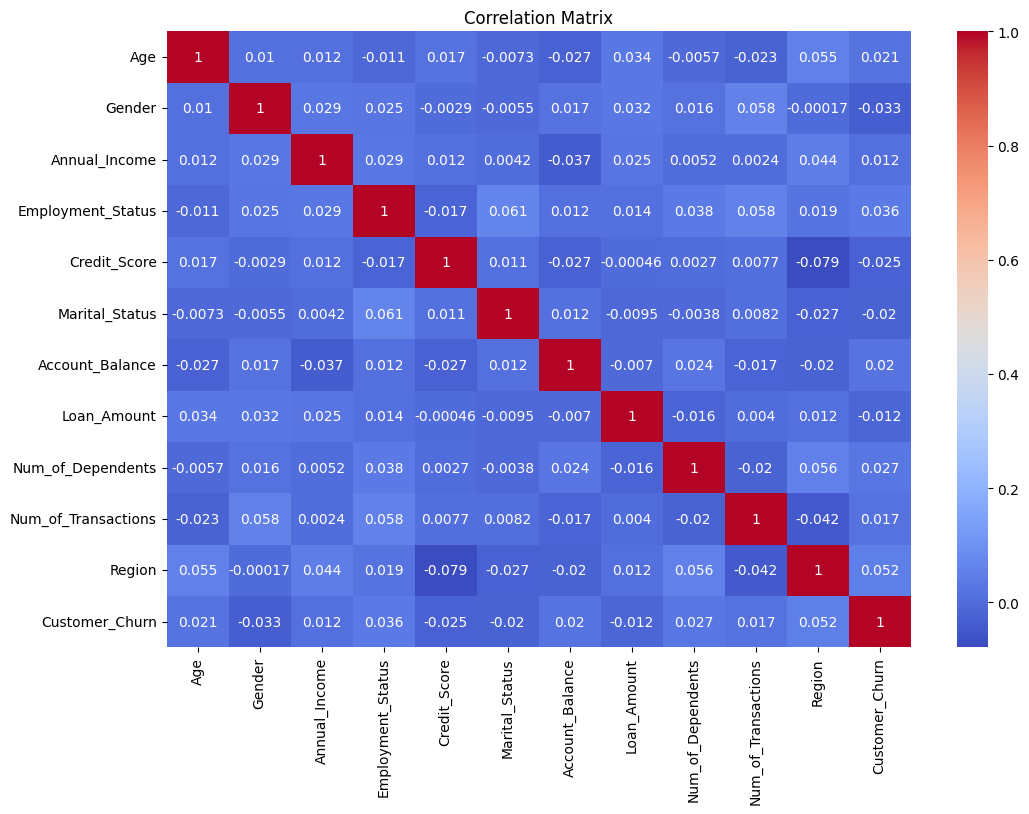

In [6]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# ***`Model Building`***

In [7]:
# Split the data
X = df.drop('Customer_Churn', axis=1)
y = df['Customer_Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Train a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
# Predictions
y_pred = rf.predict(X_test)

# ***`Model Evaluation`***

In [10]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [11]:
# Print metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.68
Precision: 0.00
Recall: 0.00
F1 Score: 0.00


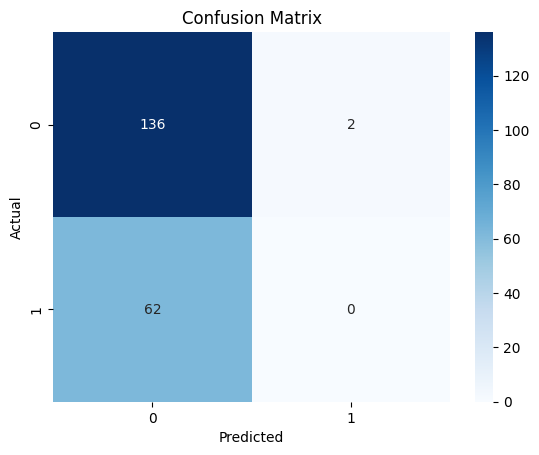

In [12]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.99      0.81       138
           1       0.00      0.00      0.00        62

    accuracy                           0.68       200
   macro avg       0.34      0.49      0.40       200
weighted avg       0.47      0.68      0.56       200

